# I. Lý thuyết

1) Tại sao mô hình R-CNN lại có tốc độ xử lý chậm?

A. Do R-CNN sử dụng các backbone rất nặng.

**B. Do các vùng region proposal được dự báo bounding box và phân loại nhãn một cách độc lập.**

C. Do thuật toán Selective Search là một phương pháp heuristic nên rất chậm 

D. Do mô hình tách biệt giữa dự báo bounding box và phân loại nhãn

2) Chỉ số mAP trong các thuật toán object detection được tính toán theo cách nào ?

A. Tính toán chỉ số AP trên từng category: Sắp xếp các Prediction Boxes của một category theo điểm số xác suất giảm dần. Thực hiện matching các Prediction Box với Ground Truth Box sao cho nếu IoU > 0.5 thì được xem là positive và trái lại là negative. Nếu Positive thì Precision sẽ có tử và mẫu cùng tăng lên 1 trong khi Recall có tử số tăng lên 1. Nếu Negative thì Precision có tử giữ nguyên và mẫu tăng lên 1 trong khi Recall không thay đổi. mAP bằng trung bình AP của toàn bộ các category.

B. Tính toán chỉ số AP trên từng category: Sắp xếp các Prediction Boxes của một category theo điểm số xác suất giảm dần. Thực hiện matching các Prediction Box với Ground Truth Box sao cho nếu IoU > 0.5 thì được xem là positive và trái lại là negative. Nếu Positive thì Precision sẽ có tử số tăng lên 1 và mẫu giữ nguyên trong khi Recall có tử số tăng lên 1. Nếu Negative thì Precision có tử giữ nguyên và mẫu tăng lên 1 trong khi Recall không thay đổi. mAP bằng trung bình AP của toàn bộ các category.

C. Tính toán chỉ số AP trên từng category: Sắp xếp các Prediction Boxes của một category theo điểm số xác suất giảm dần. Thực hiện matching các Prediction Box với Ground Truth Box sao cho nếu IoU > 0.5 thì được xem là positive và trái lại là negative. Nếu Positive thì Precision sẽ có tử và mẫu cùng tăng lên 1 trong khi Recall có tử giữ nguyên lên 1. Nếu Negative thì Precision có tử giữ nguyên và mẫu tăng lên 1 trong khi Recall không thay đổi. mAP bằng trung bình AP của toàn bộ các category.

**D. Tính toán chỉ số AP trên từng category: Sắp xếp các Prediction Boxes của một category theo điểm số xác suất giảm dần. Thực hiện matching các Prediction Box với Ground Truth Box sao cho nếu IoU > 0.5 thì được xem là positive và trái lại là negative. Nếu Positive thì Precision sẽ có tử và mẫu cùng tăng lên 1 trong khi Recall có tử số tăng lên 1. Nếu Negative thì Precision có tử giữ nguyên và mẫu tăng lên 1 trong khi Recall không thay đổi. Tính AP = diện tích dưới đường cong Precion Recall. mAP bằng trung bình AP của toàn bộ các category.**

3) Phương pháp Non Max Suppression sẽ làm gì để giảm thiểu số lượng các bounding box ?

A. Dựa vào mức độ overlapping giữa các bounding box để loại bỏ những bounding box có mức độ chồng lấn nhau lớn.

B. Dựa vào mức độ overlapping giữa các bounding box để loại bỏ những bounding box có mức độ chồng lấn nhau nhỏ.

C. Dựa vào diện tích để loại bỏ các bounding box nhỏ dưới một ngưỡng cho trước.

**D. Dựa vào mức độ overlapping để giữ lại một bounding box có điểm số cao hơn nếu chúng chồng lấn nhau lớn.**

4) Trong mô hình Fast R-CNN chúng ta thêm một nhánh mạng RPN có tác dụng gì?

**A. Dự báo ra các vùng Region of Interest có khả năng cao chứa vật thể.**

B. Dự báo xác xuất cho toàn bộ các pixel nằm trên feature map.
 
C. Dự báo bounding box và nhãn cho các vùng Region of Interest có khả năng cao chứa vật thể.

D. Điều chỉnh lại kích thước của các bounding box từ anchor box.

5) Anchor Box là gì?

A. Là những hình chữ nhật giúp xác định vị trí của vật thể

**B. Là những hình chữ nhật với kích thước xác định trước gắn liền với một pixel để làm cơ sở điều chỉnh phần bù (offset) của các tọa độ nhằm dự báo bounding box.**

C. Là những hình chữ nhật phác thảo hình dạng của bounding box cần dự báo.

D. Là hình chữ nhật gắn liền với một pixel để làm cơ sở dự báo bounding box.

# II. Thực hành 

Các câu bên dưới qui ước chung bounding box đều có tọa độ là (x, y, w, h) lần lượt tương ứng với (x, y) là điểm top-left và (w, h) là kích thước chiều rộng và cao.

##6) Xây dựng hàm tính toán IoU giữa hai bounding box.

https://medium.com/analytics-vidhya/iou-intersection-over-union-705a39e7acef#:~:text=IOU(Intersection%20over%20Union)%20is,fits%20perfectly%20around%20an%20object.

In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")
folder_path = "/content/drive/MyDrive/DLK1/Data_Cat_Dog/train/cats/"
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
import cv2
from matplotlib import pyplot as plt

In [ ]:
def draw_box(frame, boudingbox, color=(255,0,0)):
	x1, y1, x2, y2 = boudingbox
	cv2.rectangle(frame, pt1=(x1, y1), pt2=(x2, y2), color=color, thickness=2)
	return frame

In [ ]:
def IOU(box1, box2):
	""" 
		box1 = [x1,y1,x2,y2], 
    box2 = [x3,y3,x4,y4],
		(x1,y1) and (x3,y3) represent the top left coordinate,
		(x2,y2) and (x4,y4) represent the bottom right coordinate 
    """
	x1, y1, x2, y2 = box1	
	x3, y3, x4, y4 = box2
  #intersection
	x_inter1 = max(x1, x3)
	y_inter1 = max(y1, y3)
	x_inter2 = min(x2, x4)
	y_inter2 = min(y2, y4)
 #
	width_inter = abs(x_inter2 - x_inter1)
	height_inter = abs(y_inter2 - y_inter1)
	area_inter = width_inter * height_inter
	width_box1 = abs(x2 - x1)
	height_box1 = abs(y2 - y1)
	width_box2 = abs(x4 - x3)
	height_box2 = abs(y4 - y3)
	area_box1 = width_box1 * height_box1
	area_box2 = width_box2 * height_box2
	area_union = area_box1 + area_box2 - area_inter
	iou = area_inter / area_union
	return iou

In [ ]:
bbox_cat1 = [130, 32, 450, 452]	
bbox_cat2 = [140, 42, 350, 447]	
img = cv2.imread("cat.12450.jpg")	

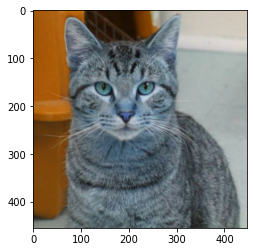

In [ ]:
	plt.imshow(img)

In [ ]:
def main():
	bbox_cat1 = [130, 32, 450, 452]	
	bbox_cat2 = [140, 42, 350, 447]	
	img = cv2.imread("cat.12450.jpg")	
	img = cv2.resize(img, (640, 480))	
	img = draw_box(img,bbox_cat1,color=(0,255,0)) 
	img = draw_box(img,bbox_cat2,color=(255,0,0)) 
	iou = IOU(bbox_cat1, bbox_cat2)
	img = cv2.putText(img, 'IOU: {}'.format(iou), (bbox_cat1[0], bbox_cat1[1]), cv2.FONT_HERSHEY_SIMPLEX , 1, 
						(255,0,0), 2, cv2.LINE_AA) 
	print("IOU OF THE BOXES IS: ", iou)
	plt.imshow(img)

IOU OF THE BOXES IS:  0.6328125


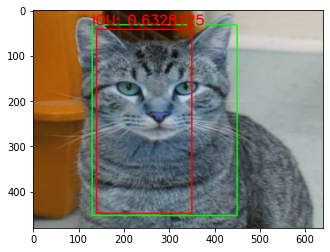

In [ ]:
if __name__ == "__main__":
	main()

##7) Giả sử các bounding box dự báo cho một category có tọa độ lần lượt là:


[10, 10, 50, 20], [15, 15, 55, 25], [50, 20, 20, 25], [20, 50, 20, 50], [30, 20, 10, 10]

Các bounding box ground truth lần lượt là:

[10, 10, 45, 25], [45, 20, 20, 25], [30, 25, 10, 10]

Hãy thực hiện vẽ đường cong Precision Recall curve và xây dựng thuật toán tính giá trị AP.

In [ ]:
import matplotlib.ticker as ticker

Đổi lại bounding box theo quy ước của câu 6)

(x1, y1, x2, y2): x1, y1 là tọa độ góc trên bên trái; x2, y2 là tọa độ góc dưới bên phải. Do đó x2 = x1 + w, y2 = y1 + h.

Tương tự như vậy ground truth box.

Ví dụ [10, 10, 50, 20] sẽ được đổi thành là [10, 10, 60, 30]

In [ ]:
pred_boud_box = [[10, 10, 60, 30], 
                  [15, 15, 70, 40], 
                  [50, 20, 70, 45], 
                  [20, 50, 40, 100], 
                  [30, 20, 40, 30]]

gr_truth = [[10, 10, 55, 35], 
            [45, 20, 65, 45], 
            [30, 25, 40, 35]]

In [ ]:
l=len(gr_truth)

In [ ]:
def pre_rec(th):
    Pre = []
    Rec = []
    TP = FP = 0
    for bd in pred_boud_box:
        for gt in gr_truth:
            iou = IOU(bd, gt)
            print(f'\nBounding box {bd} \nGround truth {gt} \nIOU = {iou}')
            if iou > th:
                TP += 1
                gr_truth.remove(gt)
                break
        if iou <= th:
            FP += 1
        pre = TP/(TP+FP)
        rec = TP/3
        Pre.append(pre)
        Rec.append(rec)
    return Pre, Rec

In [ ]:
Precision, Recall = pre_rec(0.5)
print(f'Precision: {Precision}')
print(f'Recall: {Recall}')


Bounding box [10, 10, 60, 30] 
Ground truth [10, 10, 55, 35] 
IOU = 0.7346938775510204

Bounding box [15, 15, 70, 40] 
Ground truth [45, 20, 65, 45] 
IOU = 0.2711864406779661

Bounding box [15, 15, 70, 40] 
Ground truth [30, 25, 40, 35] 
IOU = 0.07272727272727272

Bounding box [50, 20, 70, 45] 
Ground truth [45, 20, 65, 45] 
IOU = 0.6

Bounding box [20, 50, 40, 100] 
Ground truth [30, 25, 40, 35] 
IOU = 0.15789473684210525

Bounding box [30, 20, 40, 30] 
Ground truth [30, 25, 40, 35] 
IOU = 0.3333333333333333
Precision: [1.0, 0.5, 0.6666666666666666, 0.5, 0.4]
Recall: [0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


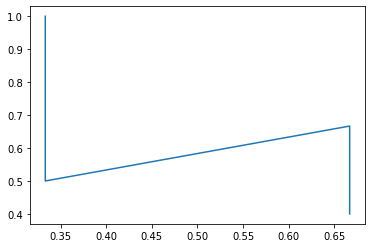

In [ ]:
plt.plot(Recall, Precision)

Text(0.5, 1.0, 'Precision-Recall Curve')

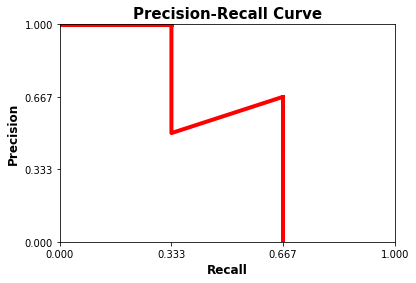

In [ ]:
plt.plot(Recall, Precision, linewidth=4, color="red")
plt.xlabel("Recall", fontsize=10, fontweight='bold')
plt.ylabel("Precision", fontsize=10, fontweight='bold')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1/3))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1/3))
plt.plot([0, 0.333], [1,1], linewidth=5, color="red")
plt.plot([0.667, 0.667], [0.667,0], linewidth=4, color="red")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Precision-Recall Curve", fontsize=15, fontweight="bold")

AP là phần nằm phía dưới đường màu đỏ

In [ ]:
AP= 0.333 + (0.667-0.333)*0.667-0.5*(0.667-0.333)*(0.667-0.5)

In [ ]:
print(AP)

0.527889



##8) Thực hiện visualize các anchor box có tỷ lệ aspect ratio (tỷ lệ width/height) lần lượt là 1, 2, 1/2 trên một feature map kích thước 20 x 20

In [ ]:
pip install mxnet 

     |████████████████████████████████| 47.3 MB 1.5 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
%matplotlib inline
import mxnet as mx
from mxnet import nd
from mxnet.contrib.ndarray import MultiBoxPrior

n = 40
# shape: batch x channel x height x weight
x = nd.random_uniform(shape=(1, 3, n, n)) 
print(x.shape) 

(1, 3, 40, 40)


In [ ]:
y = MultiBoxPrior(x, sizes=[.5, .25, .1], ratios=[1, 2, .5])
boxes = y.reshape((n, n, -1, 4))


In [ ]:
print(boxes.shape)

(40, 40, 5, 4)


https://mxnet.apache.org/versions/master/api/python/docs/api/npx/generated/mxnet.npx.multibox_prior.html

In [ ]:
print(y)


[[[-0.2375     -0.2375      0.2625      0.2625    ]
  [-0.1125     -0.1125      0.1375      0.1375    ]
  [-0.0375     -0.0375      0.0625      0.0625    ]
  ...
  [ 0.9375      0.9375      1.0375      1.0375    ]
  [ 0.63394666  0.8107233   1.3410534   1.1642767 ]
  [ 0.8107233   0.63394666  1.1642767   1.3410534 ]]]
<NDArray 1x8000x4 @cpu(0)>


In [ ]:
import matplotlib.pyplot as plt
def box_to_rect(box, color, linewidth=3):
    box = box.asnumpy()
    return plt.Rectangle(
        (box[0], box[1]), (box[2]-box[0]), (box[3]-box[1]), 
        fill=False, edgecolor=color, linewidth=linewidth)

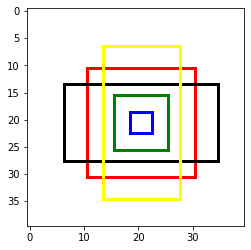

In [ ]:
colors = ['red', 'green', 'blue', 'black', 'yellow']
plt.imshow(nd.ones((n, n, 3)).asnumpy())
anchors = boxes[20, 20, :, :]
for i in range(anchors.shape[0]):
    plt.gca().add_patch(box_to_rect(anchors[i,:]*n, colors[i]))
plt.show()

In [ ]:
%matplotlib inline
from mxnet import gluon, image, np, npx

np.set_printoptions(2)  # Simplify printing accuracy
npx.set_np()

In [ ]:
y = MultiBoxPrior(x, sizes=[.5, .25, .1], ratios=[1, 2, .5])
boxes = y.reshape((20, 20, -1, 4))

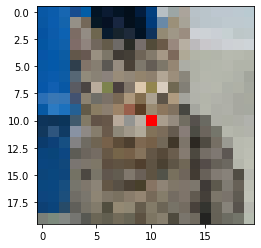

In [ ]:
img = cv2.imread("cat.12450.jpg")	
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resize = cv2.resize(imgRGB, (20, 20))
img_resize[10, 10, :] = (255, 0, 0)
plt.imshow(img_resize)

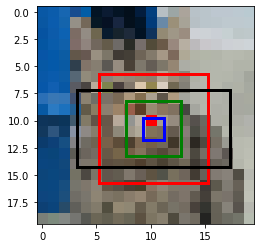

In [ ]:
plt.imshow(img_resize)
colors = ['red', 'green', 'blue', 'black']
anchors = boxes[10, 15, :, :]
for i in range(4):
    plt.gca().add_patch(box_to_rect(anchors[i,:]*20, colors[i]))
plt.show()


##9) Từ bộ dữ liệu [Vinbigdata-chest-xray](https://www.kaggle.com/c/vinbigdata-chest-xray-abnormalities-detection/data) bao gồm các tọa độ bounding box của 14 nhãn của các loại bệnh khác nhau được chuẩn đoán trên ảnh chụp chest X-ray. Thực hiện biến đổi file dữ liệu train.csv sang định dạng COCO json format. Chi tiết mô tả về dữ liệu bạn đọc ở tab data link trên.

In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")
folder_path = "/content/drive/MyDrive/DLK1/"
os.chdir(folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import json
import pandas as pd

In [ ]:
import pprint

In [ ]:
path = 'train.csv' # the path to the CSV file
save_json_path = 'traincoco.json'


data = pd.read_csv(path)

In [ ]:
data.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [ ]:
images = []
categories = []
annotations = []

category = {}
category["supercategory"] = 'none'
category["id"] = 0
category["name"] = 'None'
categories.append(category)

data['fileid'] = data['image_id'].astype('category').cat.codes
data['categoryid']= pd.Categorical(data['class_name'],ordered= True).codes
data['categoryid'] = data['categoryid']+1
data['annid'] = data.index

In [ ]:
def image(row):
    image = {}
    image["height"] = row.y_max - row.y_min
    image["width"] = row.x_max - row.x_min
    image["id"] = row.fileid
    image["file_name"] = row.image_id
    return image

In [ ]:
def category(row):
    category = {}
    category["supercategory"] = 'None'
    category["id"] = row.categoryid
    category["name"] = row[2]
    return category

In [ ]:
def annotation(row):
    annotation = {}
    area = (row.x_max -row.x_min)*(row.y_max - row.y_min)
    annotation["segmentation"] = []
    annotation["iscrowd"] = 0
    annotation["area"] = area
    annotation["image_id"] = row.fileid

    annotation["bbox"] = [row.x_min, row.y_min, row.x_max -row.x_min,row.y_max-row.y_min ]

    annotation["category_id"] = row.categoryid
    annotation["id"] = row.annid
    return annotation

In [ ]:
for row in data.itertuples():
    annotations.append(annotation(row))

imagedf = data.drop_duplicates(subset=['fileid']).sort_values(by='fileid')
for row in imagedf.itertuples():
    images.append(image(row))

catdf = data.drop_duplicates(subset=['categoryid']).sort_values(by='categoryid')
for row in catdf.itertuples():
    categories.append(category(row))

data_coco = {}
data_coco["images"] = images
data_coco["categories"] = categories
data_coco["annotations"] = annotations
json.dump(data_coco, open(save_json_path, "w"), indent=4)

In [ ]:
my_data = json.load(open('traincoco.json', 'r'))

In [ ]:
print(my_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
pprint.pprint(my_data)

Streaming output truncated to the last 5000 lines.
            {'file_name': 'e9830ce7a4a5adfbd50f18a25572bb33',
             'height': nan,
             'id': 13750,
             'width': nan},
            {'file_name': 'e988f84d11f5903f930dd67fa55ce628',
             'height': 438.0,
             'id': 13751,
             'width': 322.0},
            {'file_name': 'e98a76eaefca34840133986ed53cd210',
             'height': nan,
             'id': 13752,
             'width': nan},
            {'file_name': 'e98adf2184ec33f2943df9bb4e810bec',
             'height': nan,
             'id': 13753,
             'width': nan},
            {'file_name': 'e991a1b8b7d4d863205850ceb863343a',
             'height': 88.0,
             'id': 13754,
             'width': 385.0},
            {'file_name': 'e9954e6e3b2d0c5bf990a519c0ba5abe',
             'height': 275.0,
             'id': 13755,
             'width': 494.0},
            {'file_name': 'e9986131c41216ce7900ddfe19e38ed6',
            

##10) Hãy xây dựng thuật toán object detection để  hỗ trợ bác sĩ chuẩn đoán bệnh. Để không phải download dữ liệu, bạn nên run một notebook trên kaggle và trích dẫn link sang bài làm của bạn.

In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")
folder_path = "/content/drive/MyDrive/DLK1/"
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 12.3 MB/s 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
%matplotlib inline
import cv2
#import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from pycocotools.coco import COCO
import glob

import time
import tqdm
import random
import torchvision.transforms as T
import math
import random

import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
import torch.utils.data
from torch.utils.data import Dataset, DataLoader

In [ ]:
import pydicom

In [ ]:
df_train = pd.read_csv("train.csv")
df_train

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0


In [ ]:
df_train.loc[df_train['image_id'] == '08d0eab34ea5bab14e7e56dabafcdb7f']

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
184,08d0eab34ea5bab14e7e56dabafcdb7f,No finding,14,R8,NaN,NaN,NaN,NaN
20486,08d0eab34ea5bab14e7e56dabafcdb7f,No finding,14,R9,NaN,NaN,NaN,NaN
22572,08d0eab34ea5bab14e7e56dabafcdb7f,No finding,14,R10,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np
import json

save_json_path = 'traincoco.json'

images = []
categories = []
annotations = []

df_train = df_train[df_train['class_id'] != 14].reset_index(drop=True)

df_train['file_id'] = df_train['image_id'].astype('category').cat.codes
df_train['category_id'] = pd.Categorical(df_train['class_name'], ordered= True).codes + 1
df_train['annid'] = df_train.index
df_train

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,file_id,category_id,annid
0,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2650,4,0
1,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,96,1,1
2,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0,481,12,2
3,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0,224,6,3
4,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0,1246,9,4
...,...,...,...,...,...,...,...,...,...,...,...
36091,b53d1dd80e99ca6bcef9d592f65d3321,Pleural effusion,10,R9,240.0,1550.0,562.0,2001.0,3130,11,36091
36092,26d1d5a0ef2e692c6340e74859ffdc53,Pulmonary fibrosis,13,R10,1163.0,787.0,1338.0,941.0,663,14,36092
36093,22672ab82c290c20b86863291e25ef6c,ILD,5,R9,299.0,664.0,794.0,1508.0,576,6,36093
36094,db169d0be36123bd55b866d6aa73983b,Other lesion,9,R8,6.0,670.0,272.0,1736.0,3779,10,36094


In [ ]:
def image(row):
    image = {}
    image["height"] = abs(row.y_max - row.y_min)
    image["weight"] = abs(row.x_max - row.x_min)
    image["id"] = row.file_id
    image["file_name"] = row.image_id + '.dicom'
    return image

def category(row):
    category = {}
    category['supercategory'] = 'None'
    category['id'] = row.category_id
    category['name'] = row.class_name
    return category

def annotation(row):
    annotation = {}
    area = (row.x_max - row.x_min) * (row.y_max - row.y_min) 

    annotation['segmentation'] = []
    annotation['iscrowd'] = 0
    annotation['area'] = area
    annotation['image_id'] = row.file_id
    
    annotation['bbox'] = [row.x_min, row.y_min, row.x_max - row.x_min, row.y_max - row.y_min]
   
    annotation['category_id'] = row.category_id
    annotation['id'] = row.annid
    return annotation

for row in df_train.itertuples():
    annotations.append(annotation(row))
    
imagedf = df_train.drop_duplicates(subset=['file_id']).sort_values(by='file_id')
for row in imagedf.itertuples():
    images.append(image(row))
    
catdf = df_train.drop_duplicates(subset=['category_id']).sort_values(by='category_id')
for row in catdf.itertuples():
    categories.append(category(row))
    
data_coco = {}
data_coco['images'] = images
data_coco['categories'] = categories
data_coco['annotations'] = annotations
json.dump(data_coco, open(save_json_path, 'w'), indent=4)

print("Create COCO json finished!")

Create COCO json finished!


In [ ]:
def dicom2array(path, voi_lut=True, fix_monochrome=True):
    
    dicom = pydicom.dcmread(path)
    
    # VOI LUT (if available by DICOM device) is used to
    # transform raw DICOM data to "human-friendly" view
    #if voi_lut:
        #data = apply_voi_lut(dicom.pixel_array, dicom)
    #else:
    data = dicom.pixel_array
        
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    
    return data

In [ ]:
class VBDDataset(Dataset):
    def __init__(self, root, annotation, transforms=None):
        self.root = root
        self.transforms = transforms
        self.coco = COCO(annotation)
        self.ids = list(sorted(self.coco.imgs.keys()))
        
    def __getitem__(self, index):
        coco = self.coco
        img_id = self.ids[index]
        # List: get annotation id from coco
        ann_ids = coco.getAnnIds(imgIds=img_id)
        # Dictionary: target coco_annotation file for an image
        coco_annotation = coco.loadAnns(ann_ids)
        # path for input image
        path = coco.loadImgs(img_id)[0]['file_name']
        # open the input image
#         img_arr = dicom2array(os.path.join(self.root, path))
#         img = Image.fromarray(img_arr)
        image_file = pydicom.dcmread(os.path.join(self.root, path))
        img = np.array(image_file.pixel_array, dtype=np.float32)[np.newaxis]  # Add channel dimension
        img = torch.from_numpy(img)
#         img = Image.open(os.path.join(self.root, path))
        
        # number of objects in the image
        num_objs = len(coco_annotation)
        
        # Bounding boxes for objects
        # In coco format, bbox = [xmin, ymin, width, height]
        # In pytorch, the input should be [xmin, ymin, xmax, ymax]
        boxes = []
        for i in range(num_objs):
            xmin = coco_annotation[i]['bbox'][0]
            ymin = coco_annotation[i]['bbox'][1]
            xmax = xmin + coco_annotation[i]['bbox'][2]
            ymax = ymin + coco_annotation[i]['bbox'][3]
            boxes.append([xmin, ymin, xmax, ymax])
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        
        # Labels
        labels = torch.squeeze(torch.as_tensor((num_objs,), dtype=torch.int64))
        
        # Tensorise img_id
        img_id = torch.tensor([img_id])
        
        # Size of bbox (Rectangular)
        areas = []
        for i in range(num_objs):
            areas.append(coco_annotation[i]['area'])
        areas = torch.as_tensor(areas, dtype=torch.float32)
        
        # Iscrowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
        
        # Annotation is in dictionary format
        my_annotation = {}
        my_annotation['boxes'] = boxes
        my_annotation['labels'] = labels
        my_annotation['image_id'] = img_id
        my_annotation['area'] = areas
        my_annotation['iscrowd'] = iscrowd
               
        return img, my_annotation
    
    def __len__(self):
        return len(self.ids)

In [ ]:
TRAIN_DIR = "../input/vinbigdata-chest-xray-abnormalities-detection/train"
TEST_DIR = "../input/vinbigdata-chest-xray-abnormalities-detection/test"

TRAIN_COCO = "./traincoco.json"

In [ ]:
from sklearn.model_selection import train_test_split
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2